In [ ]:
pip install pmdarima -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mmm_data/train_data.csv')
df_base = df[['date', 'revenue']]
df_base['date'] = pd.to_datetime(df_base['date'])
df_base = df_base.set_index('date')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2010-01-01 to 2014-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


<ipython-input-3-aa91b2eac8d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['date'] = pd.to_datetime(df_base['date'])


In [ ]:
ns_p_list, ns_d_list, ns_q_list = [], [], []
s_P_list, s_D_list, s_Q_list = [], [], []
seasonal_list = []
aic_list = []
counter = 1
for seasonal_len in [12,4,2,1]:
      # use pmdarima to automatically select best ARIMA model
      model = pm.auto_arima(df_base,
                          m=seasonal_len,     # the number of observations per seasonal cycle
                          seasonal=True,      # TRUE if seasonal series
                          d=None,             # let model determine 'd'
                          test='adf',         # use adftest to find optimal 'd'
                          start_p=0, start_q=0, # minimum p and q
                          max_p=3, max_q=3, # maximum p and q
                          D=None,             # let model determine 'D'
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=False,
                          n_jobs=-1)
                          # stepwise=True)

      ns_p_list.append(model.order[0])
      ns_d_list.append(model.order[1])
      ns_q_list.append(model.order[2])
      s_P_list.append(model.seasonal_order[0])
      s_D_list.append(model.seasonal_order[1])
      s_Q_list.append(model.seasonal_order[2])
      seasonal_list.append(model.seasonal_order[3])
      aic_list.append(model.aic())
      counter += 1

result = {
    'ns_p': ns_p_list,
    'ns_d': ns_d_list,
    'ns_q': ns_q_list,
    's_P': s_P_list,
    's_D': s_D_list,
    's_Q': s_Q_list,
    's': seasonal_list,
    'aic':aic_list}
result_df = pd.DataFrame(result)

display(result_df)


Best model:  ARIMA(2,0,1)(1,0,1)[12] intercept
Total fit time: 290.041 seconds

Best model:  ARIMA(1,0,0)(2,0,2)[4] intercept
Total fit time: 141.768 seconds

Best model:  ARIMA(1,0,0)(2,0,2)[2] intercept
Total fit time: 40.297 seconds

Best model:  ARIMA(2,0,3)(0,0,0)[1] intercept
Total fit time: 5.864 seconds


,ns_p,ns_d,ns_q,s_P,s_D,s_Q,s,aic
0,2,0,1,1,0,1,12,50815.003224
1,1,0,0,2,0,2,4,50783.730180
2,1,0,0,2,0,2,2,50891.139266
3,2,0,3,0,0,0,1,50907.163742


In [ ]:
ns_p_list, ns_d_list, ns_q_list = [], [], []
s_P_list, s_D_list, s_Q_list = [], [], []
seasonal_list = []
aic_list = []
counter = 1
for seasonal_len in [52]:
      # use pmdarima to automatically select best ARIMA model
      model = pm.auto_arima(df_base,
                          m=seasonal_len,     # the number of observations per seasonal cycle
                          seasonal=True,      # TRUE if seasonal series
                          d=None,             # let model determine 'd'
                          test='adf',         # use adftest to find optimal 'd'
                          start_p=0, start_q=0, # minimum p and q
                          max_p=4, max_q=4, # maximum p and q
                          D=None,             # let model determine 'D'
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=False,
                          n_jobs=-1)
                          # stepwise=True)

      ns_p_list.append(model.order[0])
      ns_d_list.append(model.order[1])
      ns_q_list.append(model.order[2])
      s_P_list.append(model.seasonal_order[0])
      s_D_list.append(model.seasonal_order[1])
      s_Q_list.append(model.seasonal_order[2])
      seasonal_list.append(model.seasonal_order[3])
      aic_list.append(model.aic())
      counter += 1

result = {
    'ns_p': ns_p_list,
    'ns_d': ns_d_list,
    'ns_q': ns_q_list,
    's_P': s_P_list,
    's_D': s_D_list,
    's_Q': s_Q_list,
    's': seasonal_list,
    'aic':aic_list}
result_df = pd.DataFrame(result)

display(result_df)

In [ ]:
result_df

In [ ]:
def plot_df(x, y, title="", xlabel='date', ylabel='revenue', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y) # , color='tab:red'
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

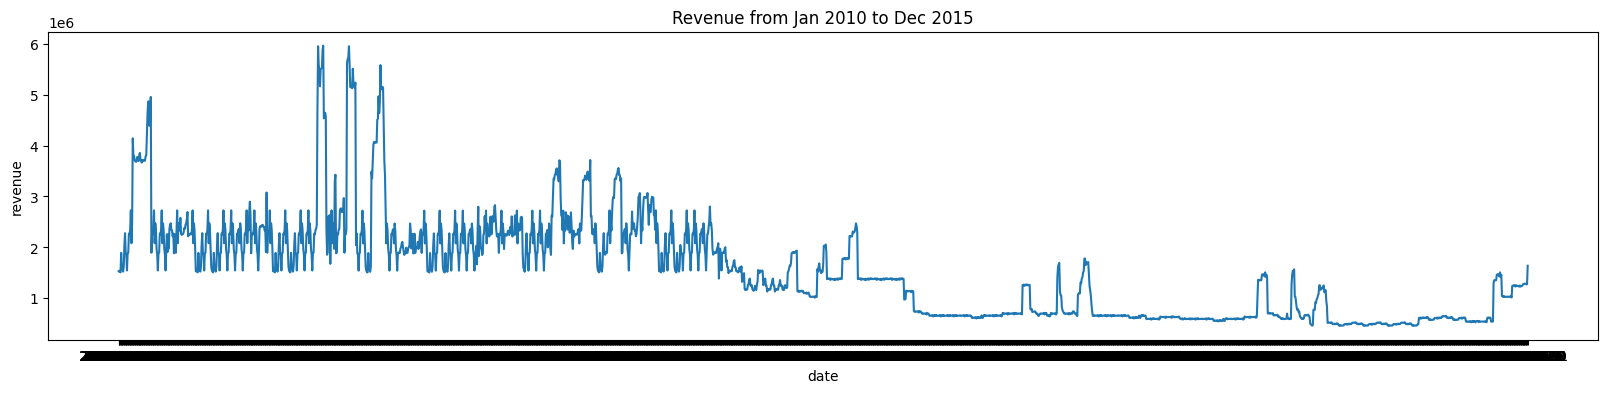

In [ ]:
plot_df(x=df['date'], y=df['revenue'], title='Revenue from Jan 2010 to Dec 2015')

# Multiplicative Decomposition

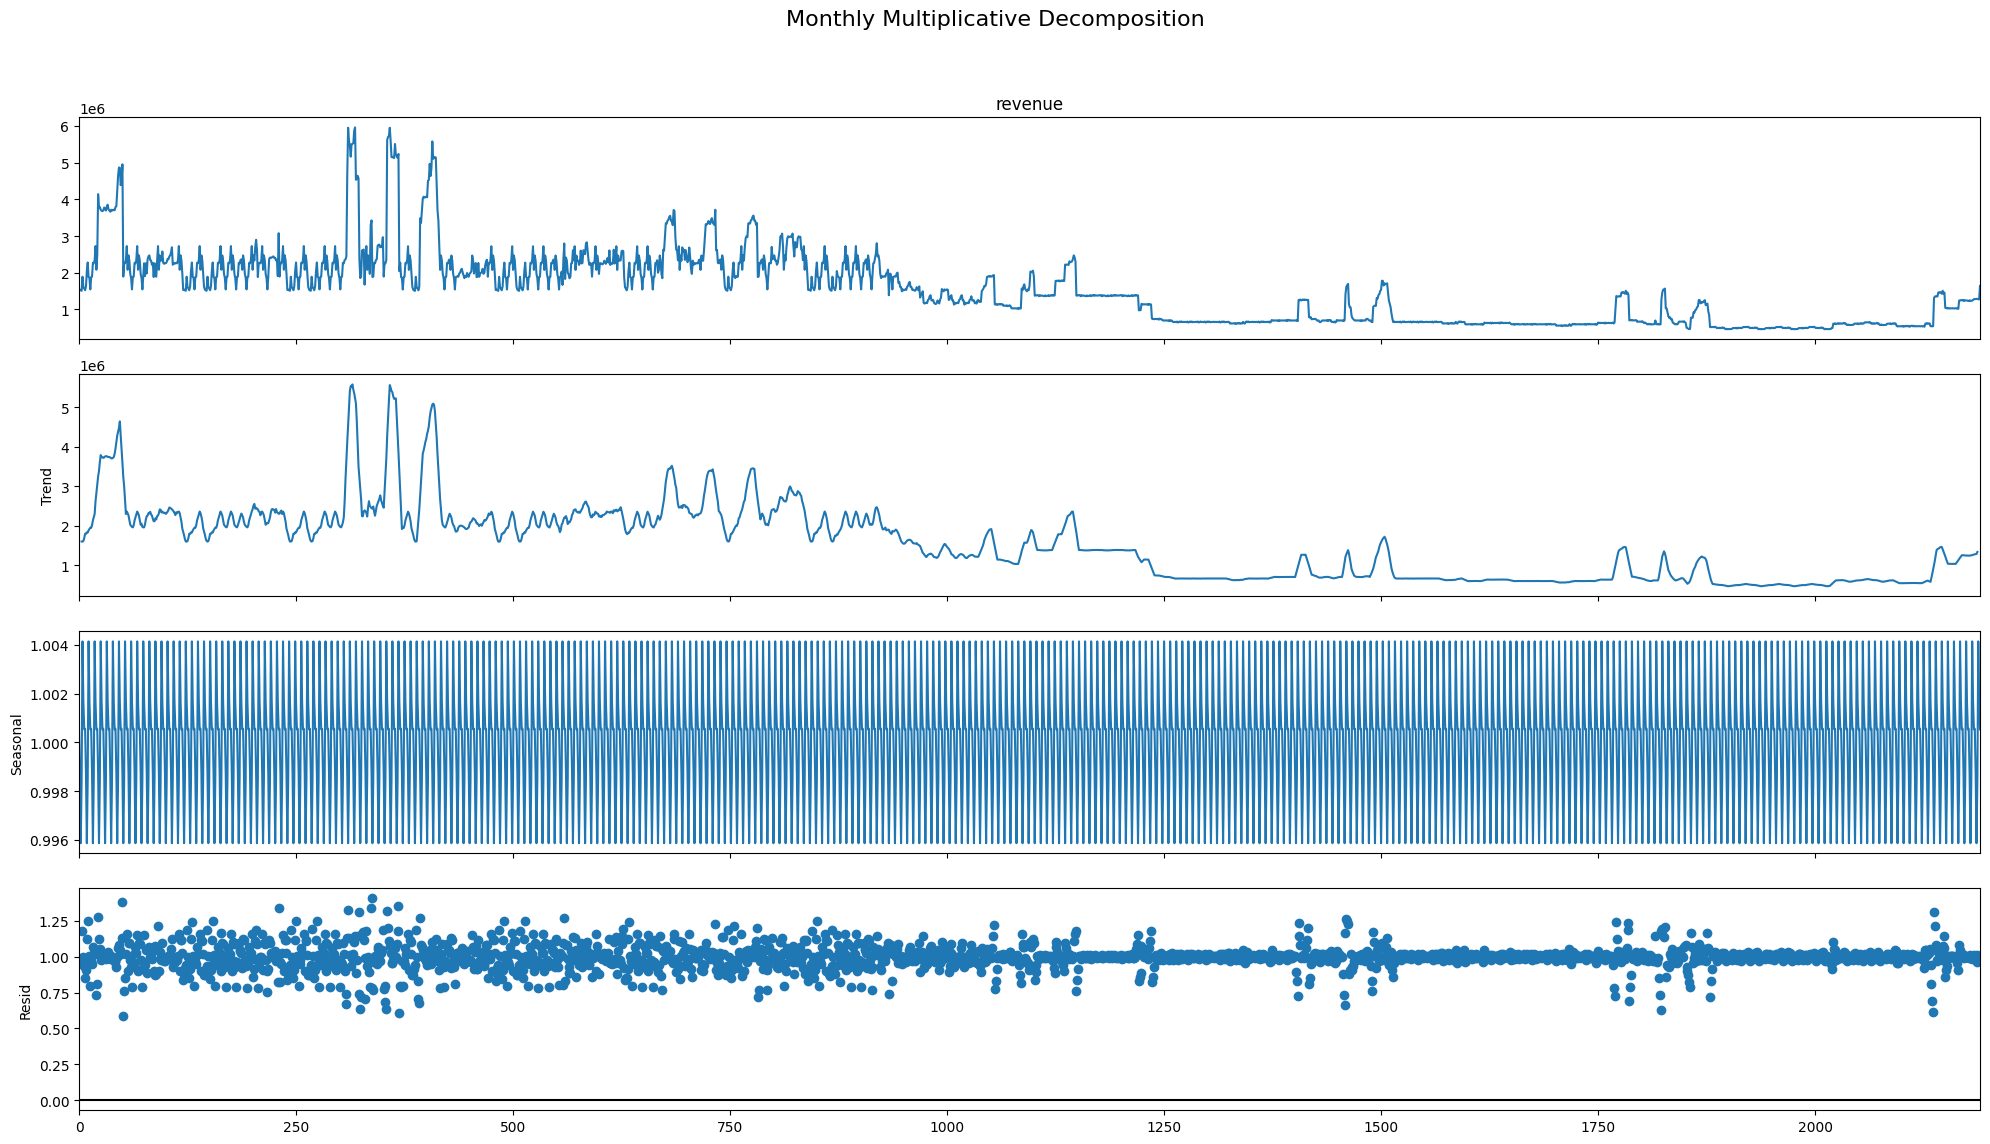

In [ ]:
multiplicative_decomposition_w = seasonal_decompose(df_base['revenue'], model='multiplicative', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition_w.plot().suptitle('Monthly Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

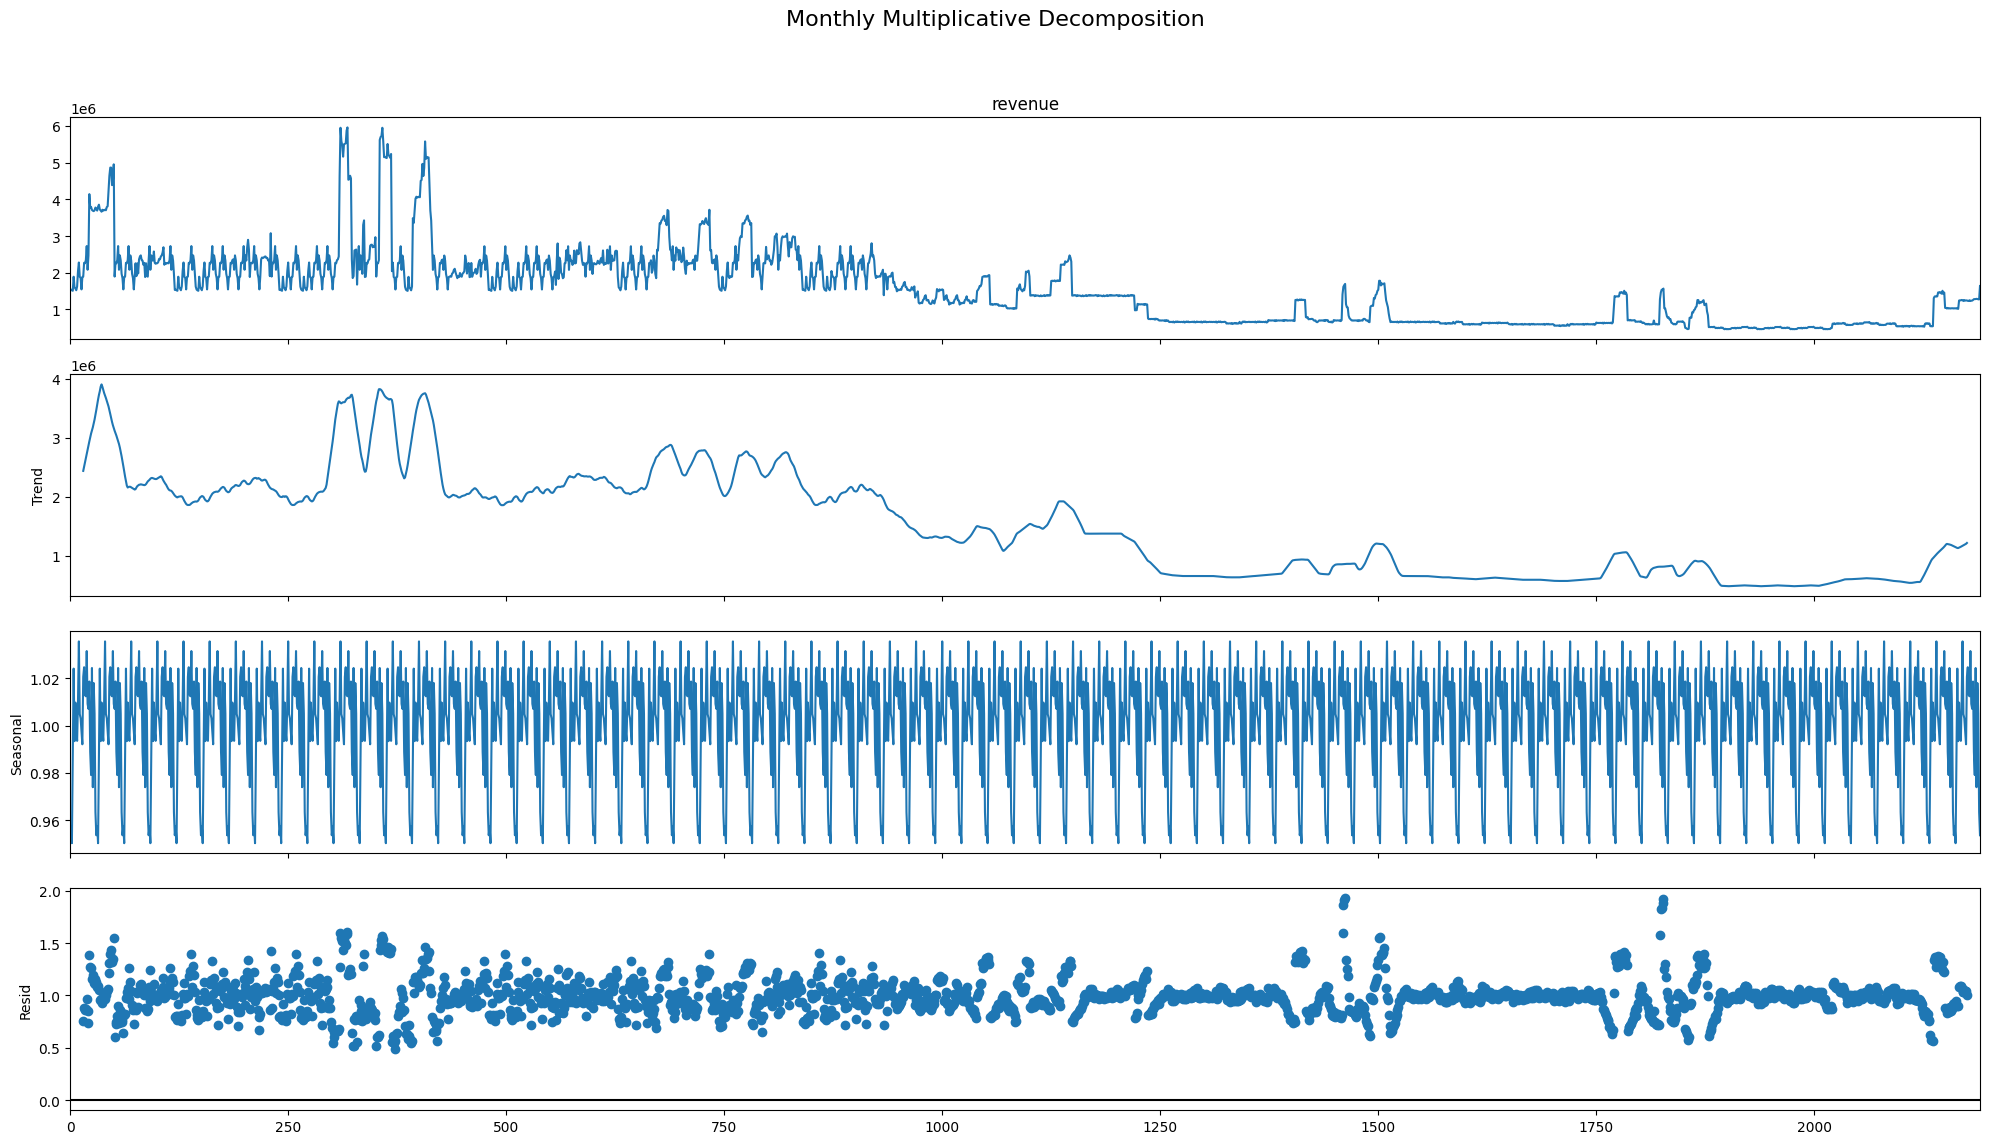

In [ ]:
multiplicative_decomposition_m = seasonal_decompose(df_base['revenue'], model='multiplicative', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition_m.plot().suptitle('Monthly Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

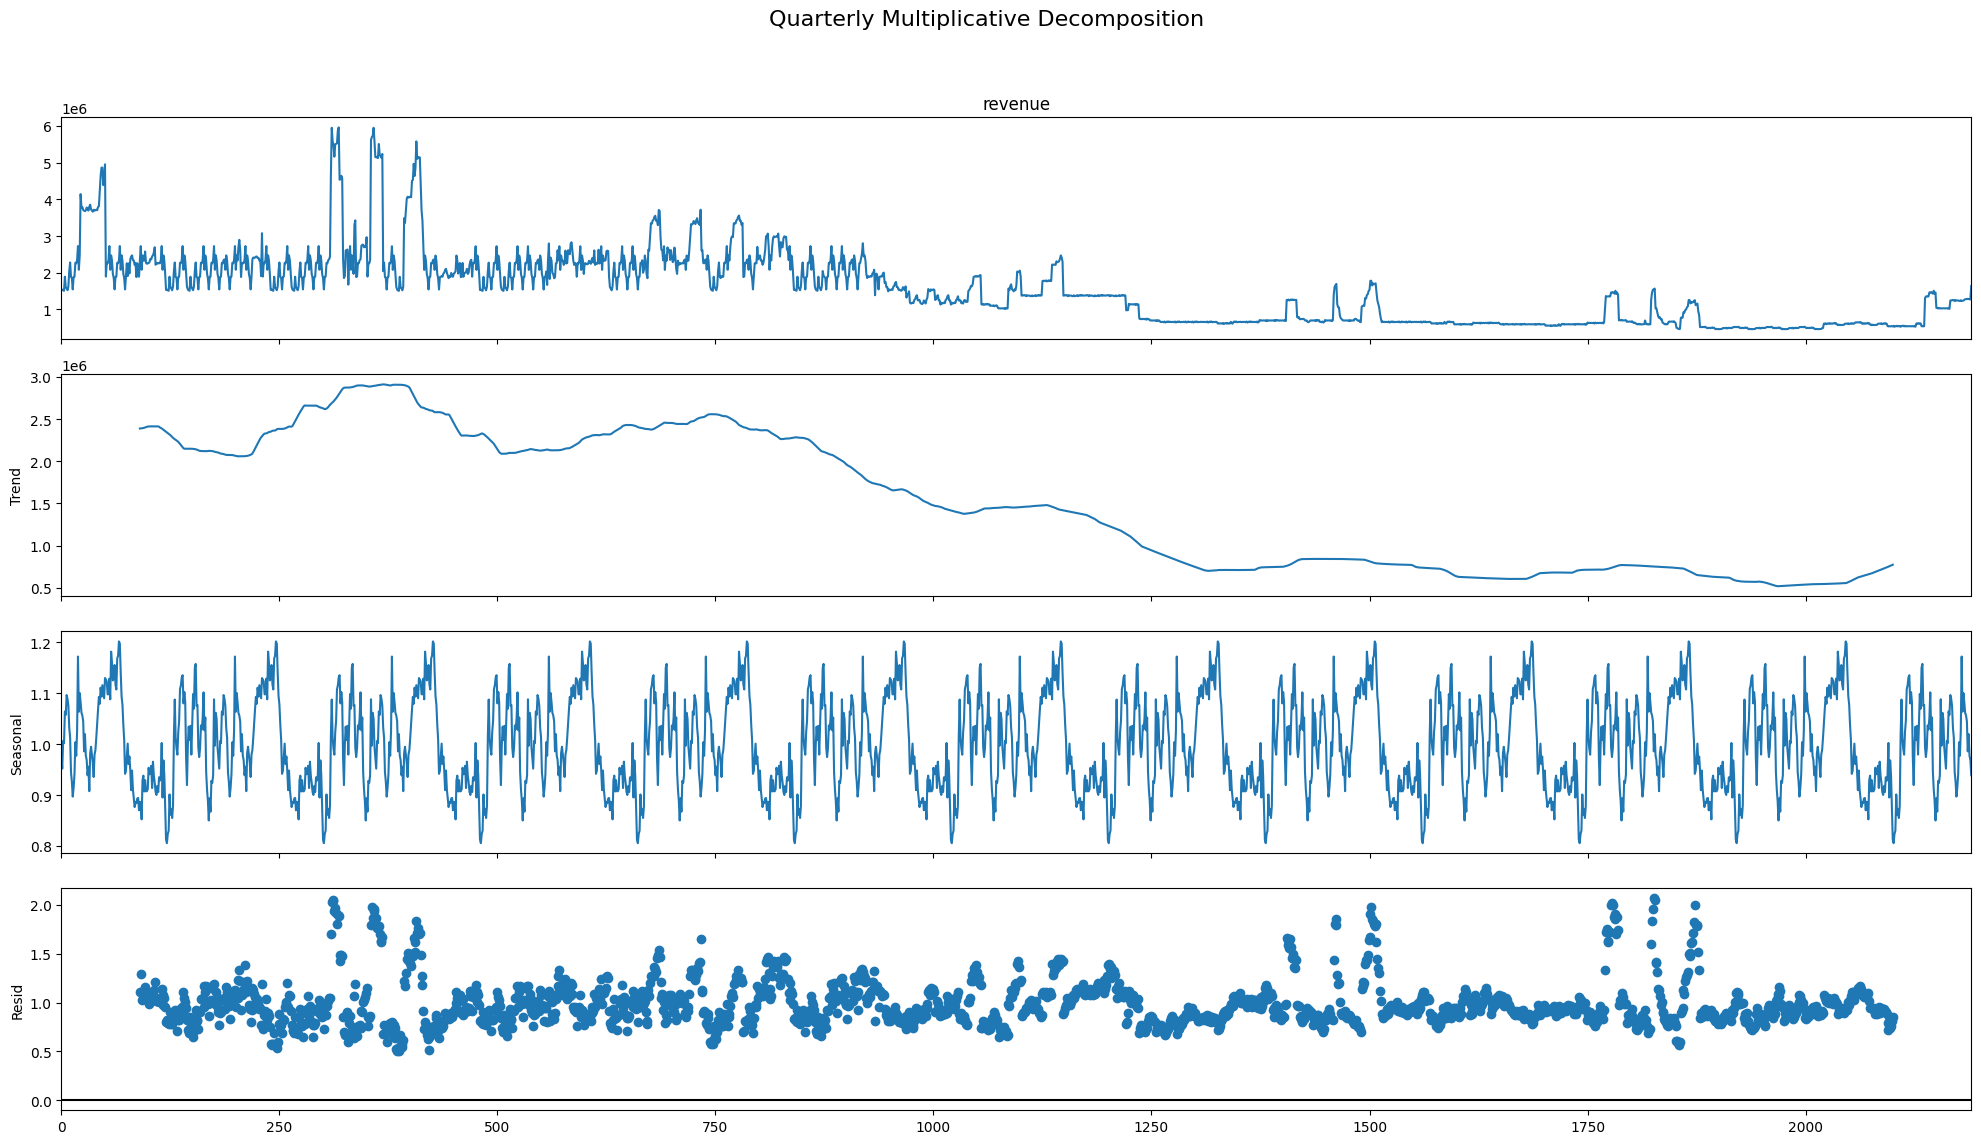

In [ ]:
multiplicative_decomposition_q = seasonal_decompose(df_base['revenue'], model='multiplicative', period=180)

# Plot
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition_q.plot().suptitle('Quarterly Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

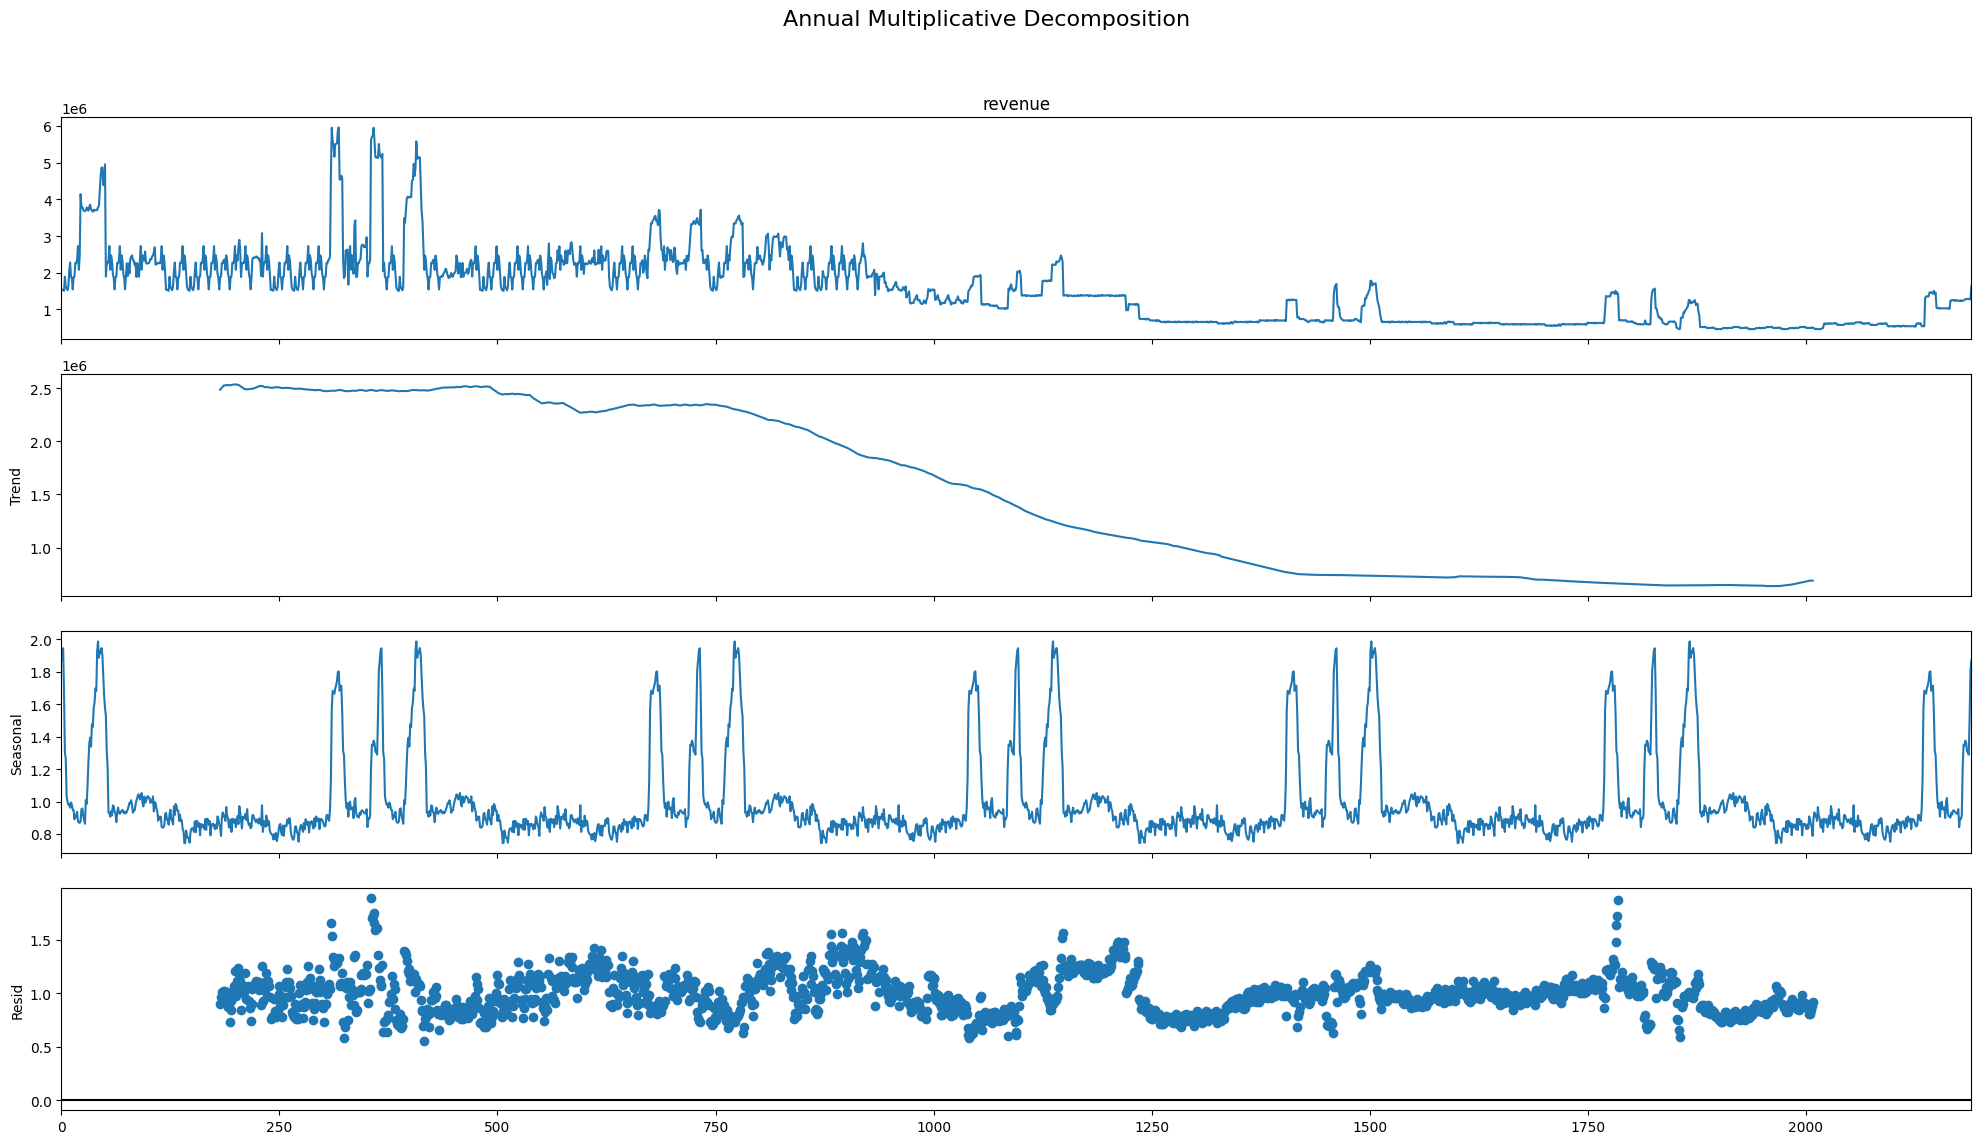

In [ ]:
multiplicative_decomposition_a = seasonal_decompose(df_base['revenue'], model='multiplicative', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition_a.plot().suptitle('Annual Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Additive Decomposition

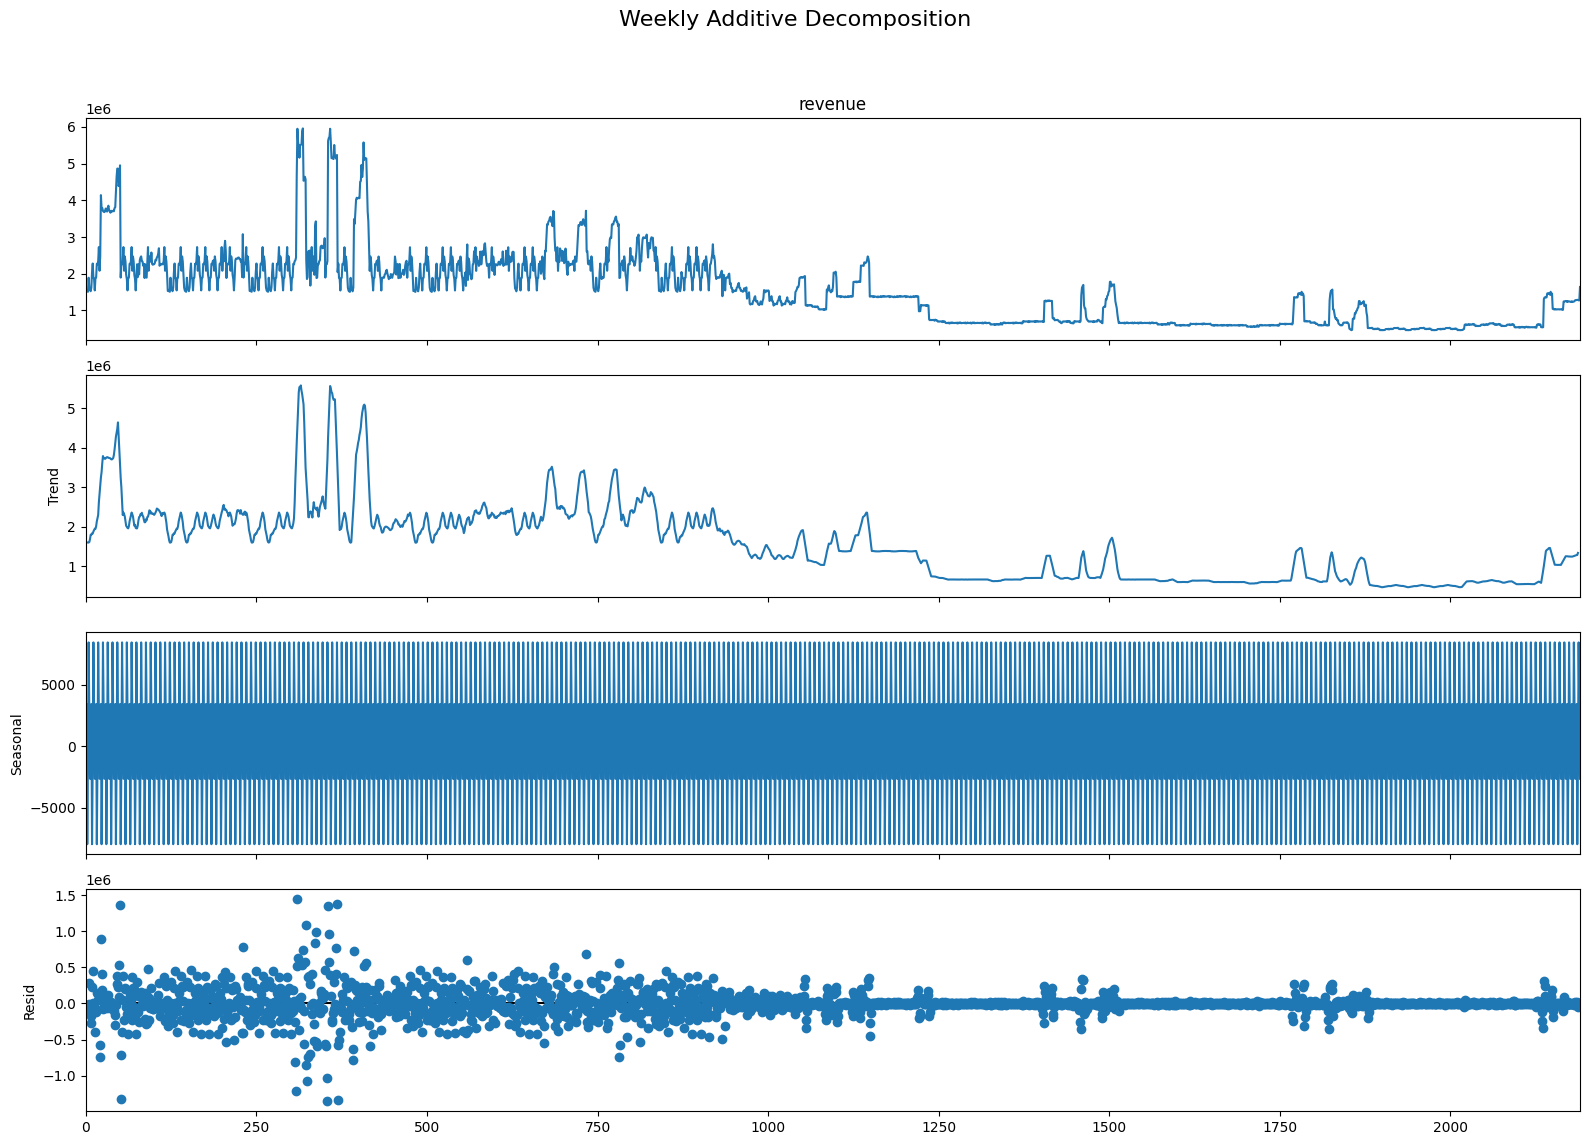

In [ ]:
additive_decomposition_w = seasonal_decompose(df['revenue'], model='additive', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition_w.plot().suptitle('Weekly Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

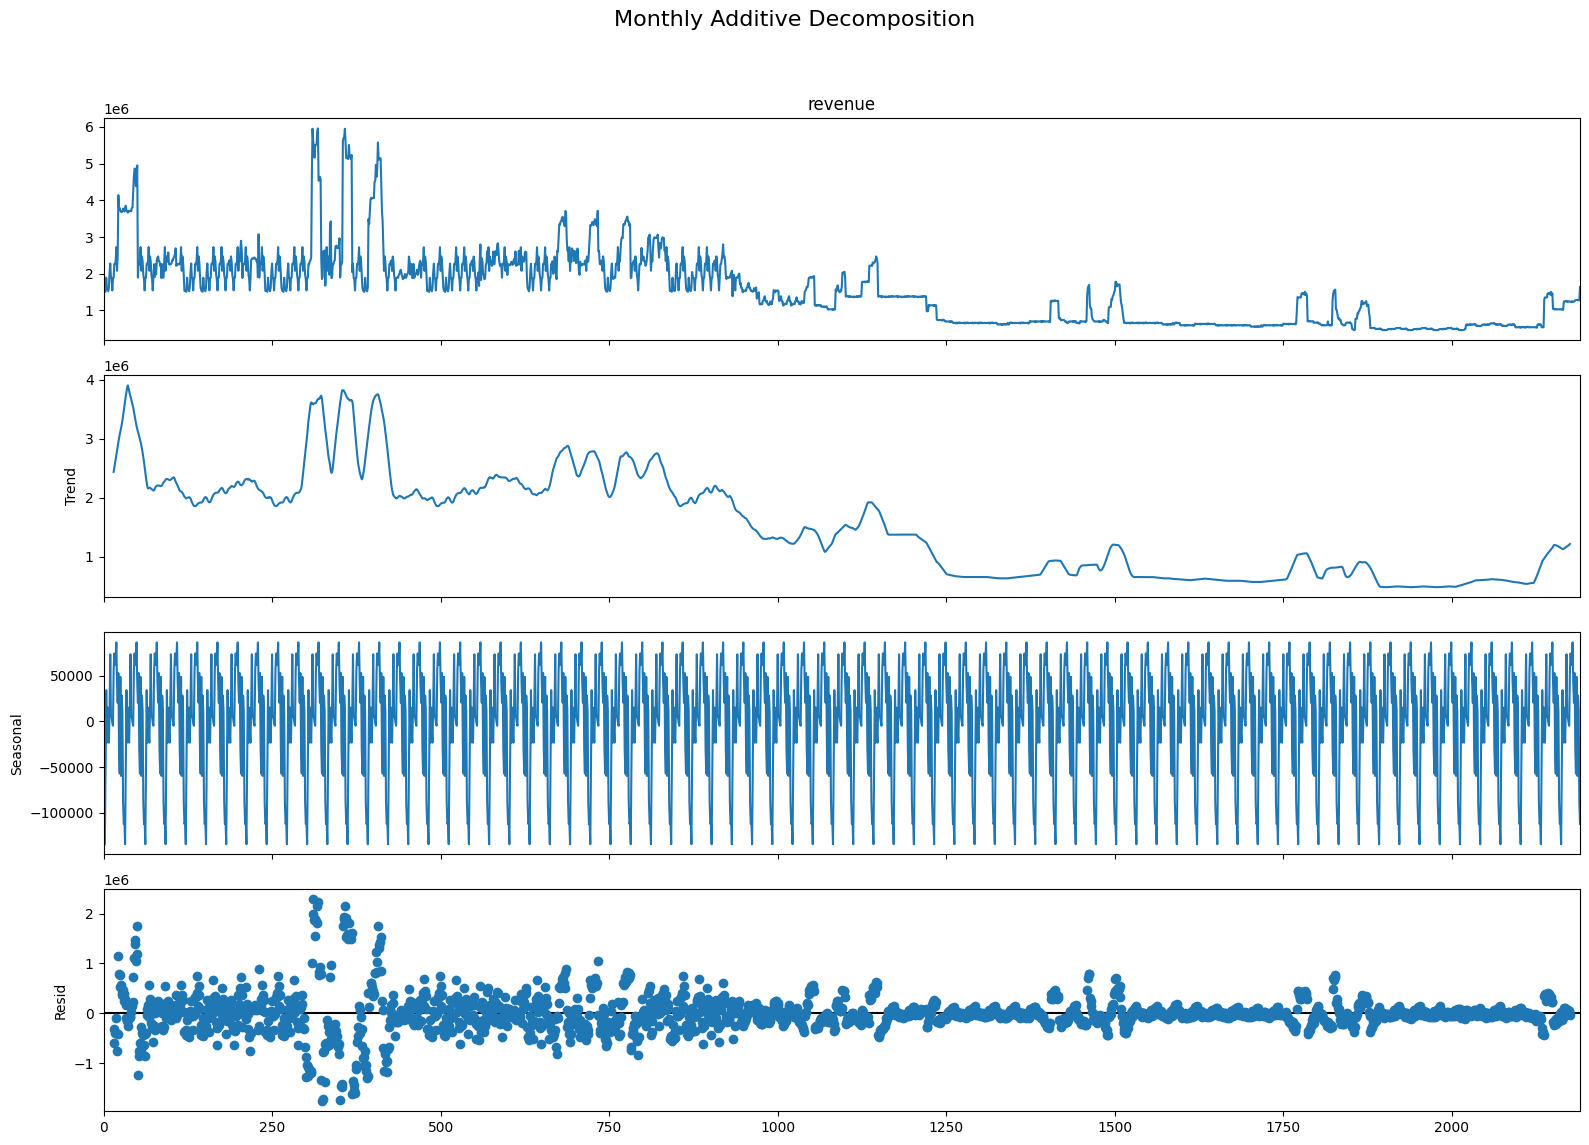

In [ ]:
additive_decomposition_m = seasonal_decompose(df['revenue'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition_m.plot().suptitle('Monthly Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

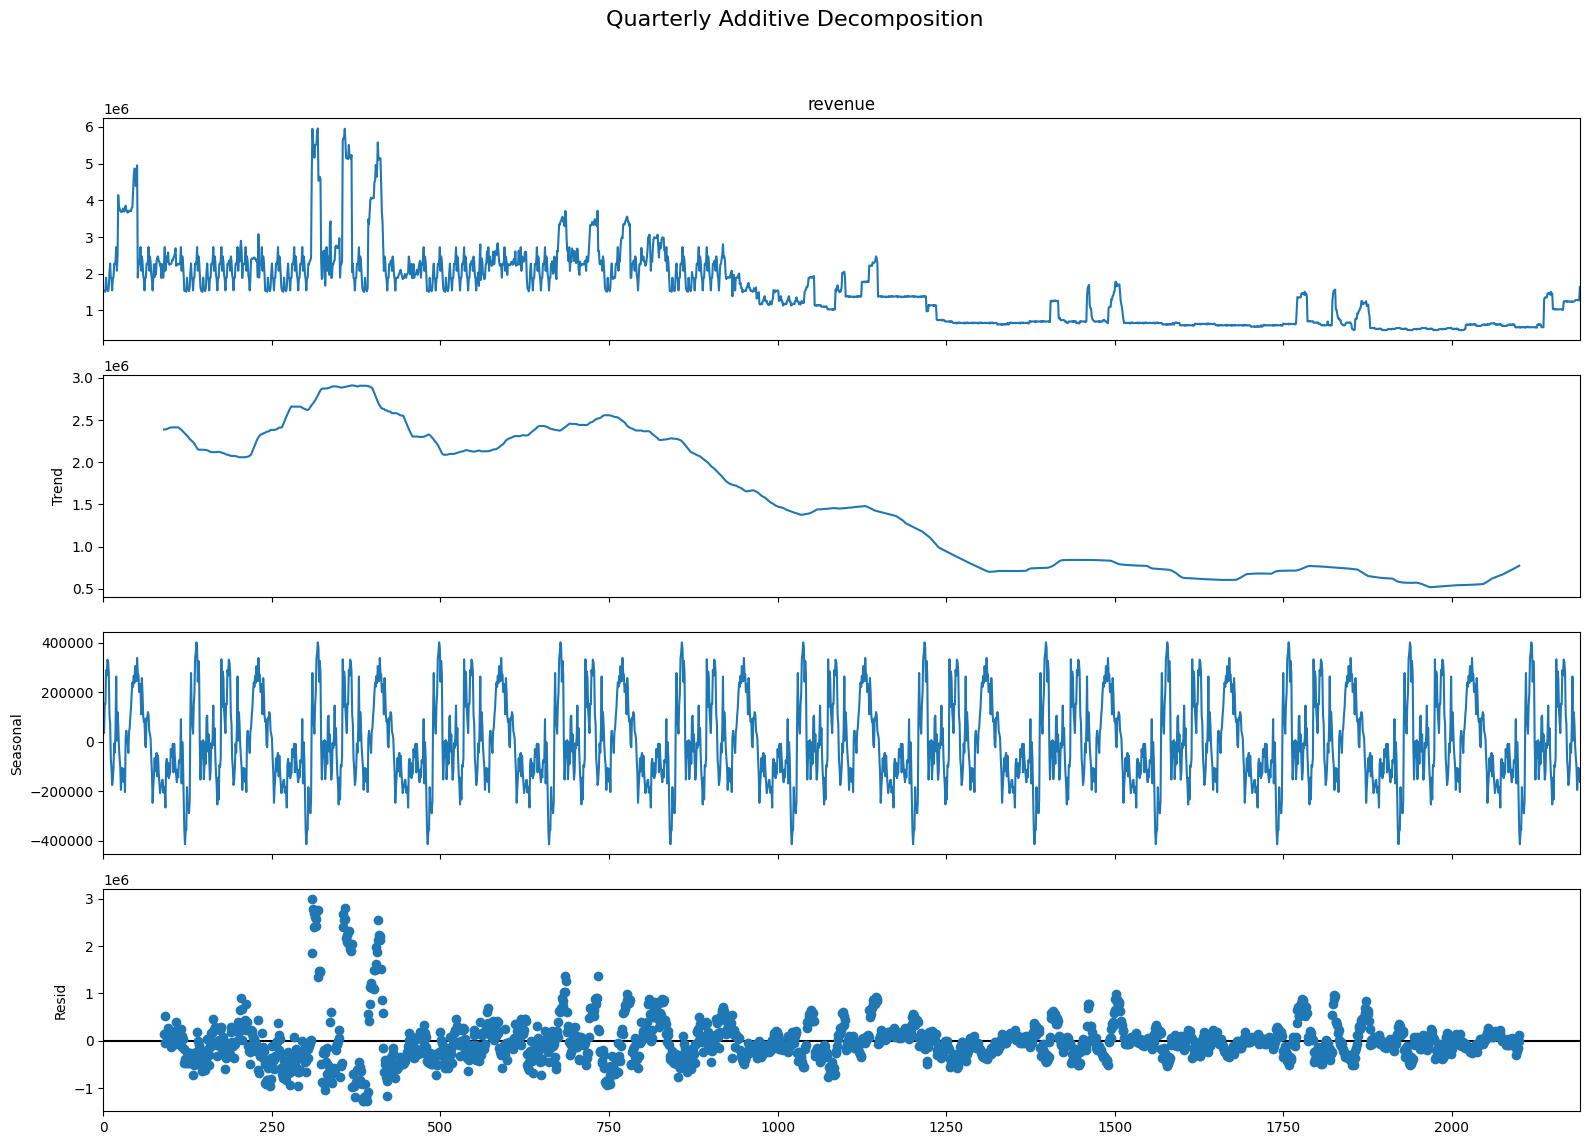

In [ ]:
additive_decomposition_q = seasonal_decompose(df['revenue'], model='additive', period=180)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition_q.plot().suptitle('Quarterly Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

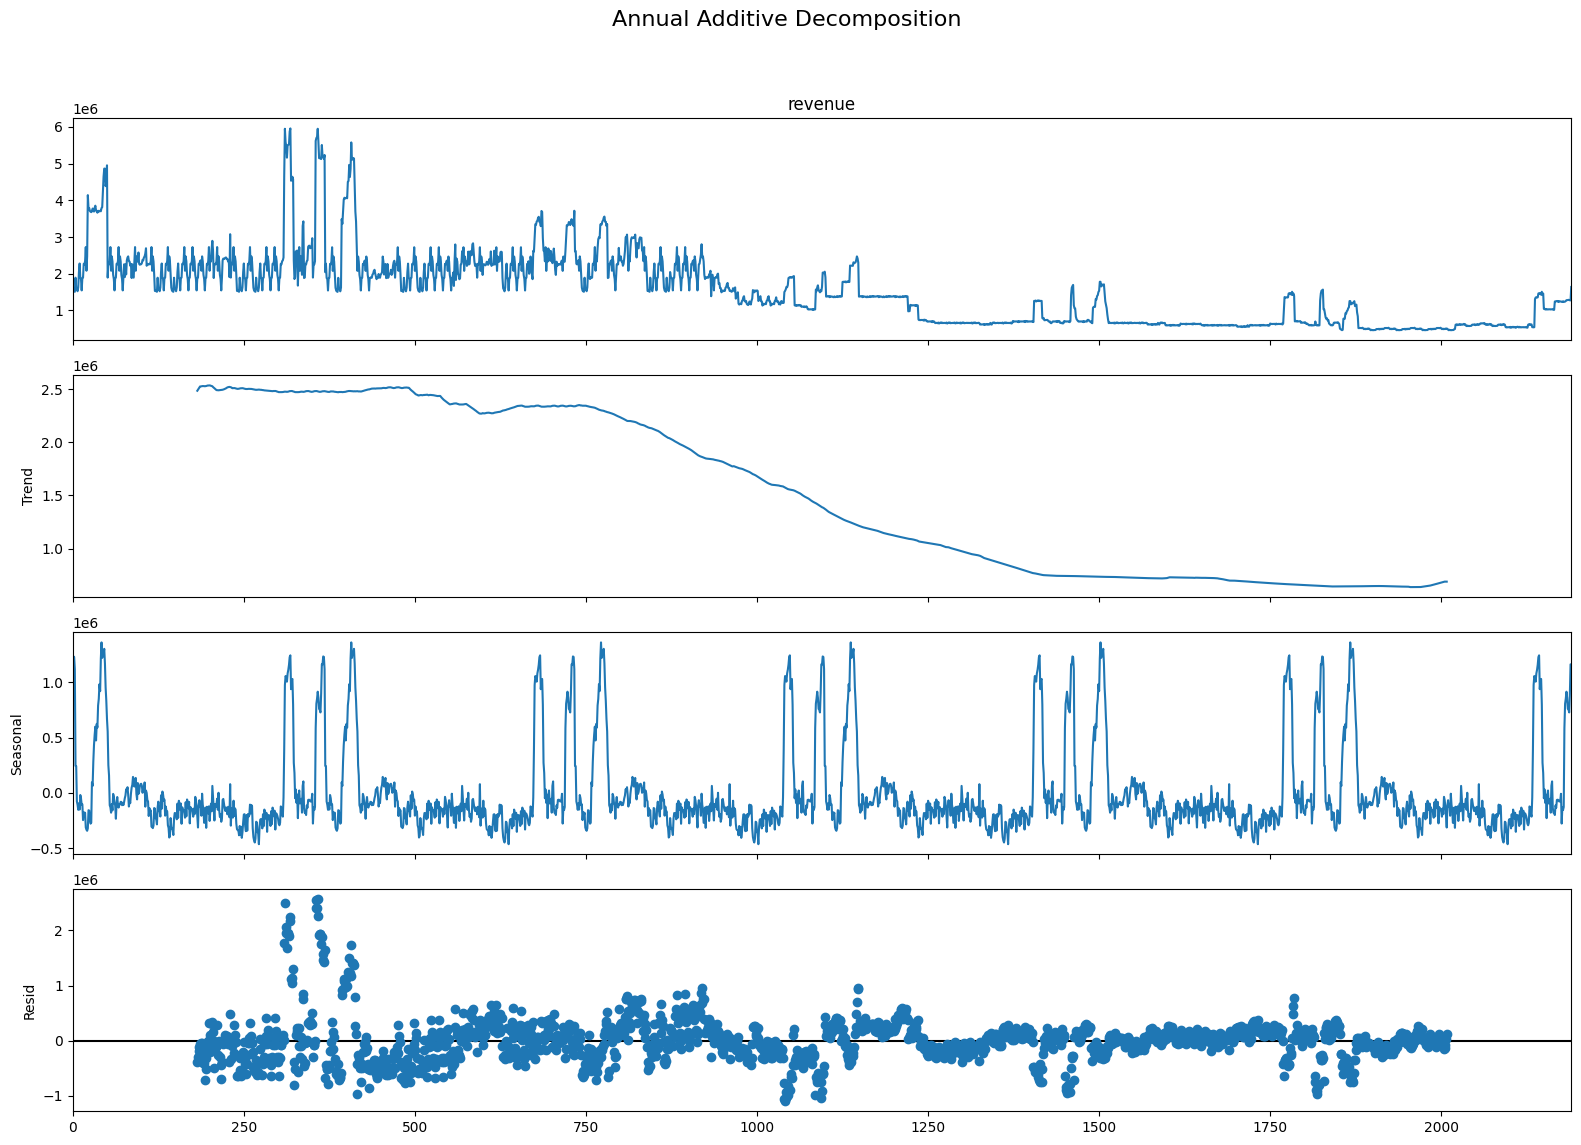

In [ ]:
additive_decomposition_a = seasonal_decompose(df['revenue'], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition_a.plot().suptitle('Annual Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()